<a href="https://colab.research.google.com/github/nikhilkemkar/HealthInsuranceCrossSellPrediction/blob/main/HealthInsuranceCrossSellPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - <font color='#E2532F'>**Health Insurance Cross Sell Prediction**</font>



##### **Project Type -**    Classification
##### **Contribution -**    DataMiners Team
##### **Team Member 1 -**    Nikhil Kemkar
##### **Team Member 2 -**    Aditya Sakhre


# **Project Summary -**

> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of 5000 each year for a health insurance cover of 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto 200,000.

Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **GitHub Link -**

# **Problem Statement**


**Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline


# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Importing Machine Learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Classification algorithm metrics
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 14})

### Dataset Loading

In [ ]:
# Load Dataset
path='/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (2).csv.crdownload'
df=pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
56837,56838,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,56839,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,56840,Female,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,56841,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0
56841,56842,Male,21,1,15.0,1,< 1 Year,No,36876.0,160.0,11,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
x = df.shape
print(f'The dataset has {x[0]} rows and {x[1]} columns')

The dataset has 56842 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 0


### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


<Axes: >

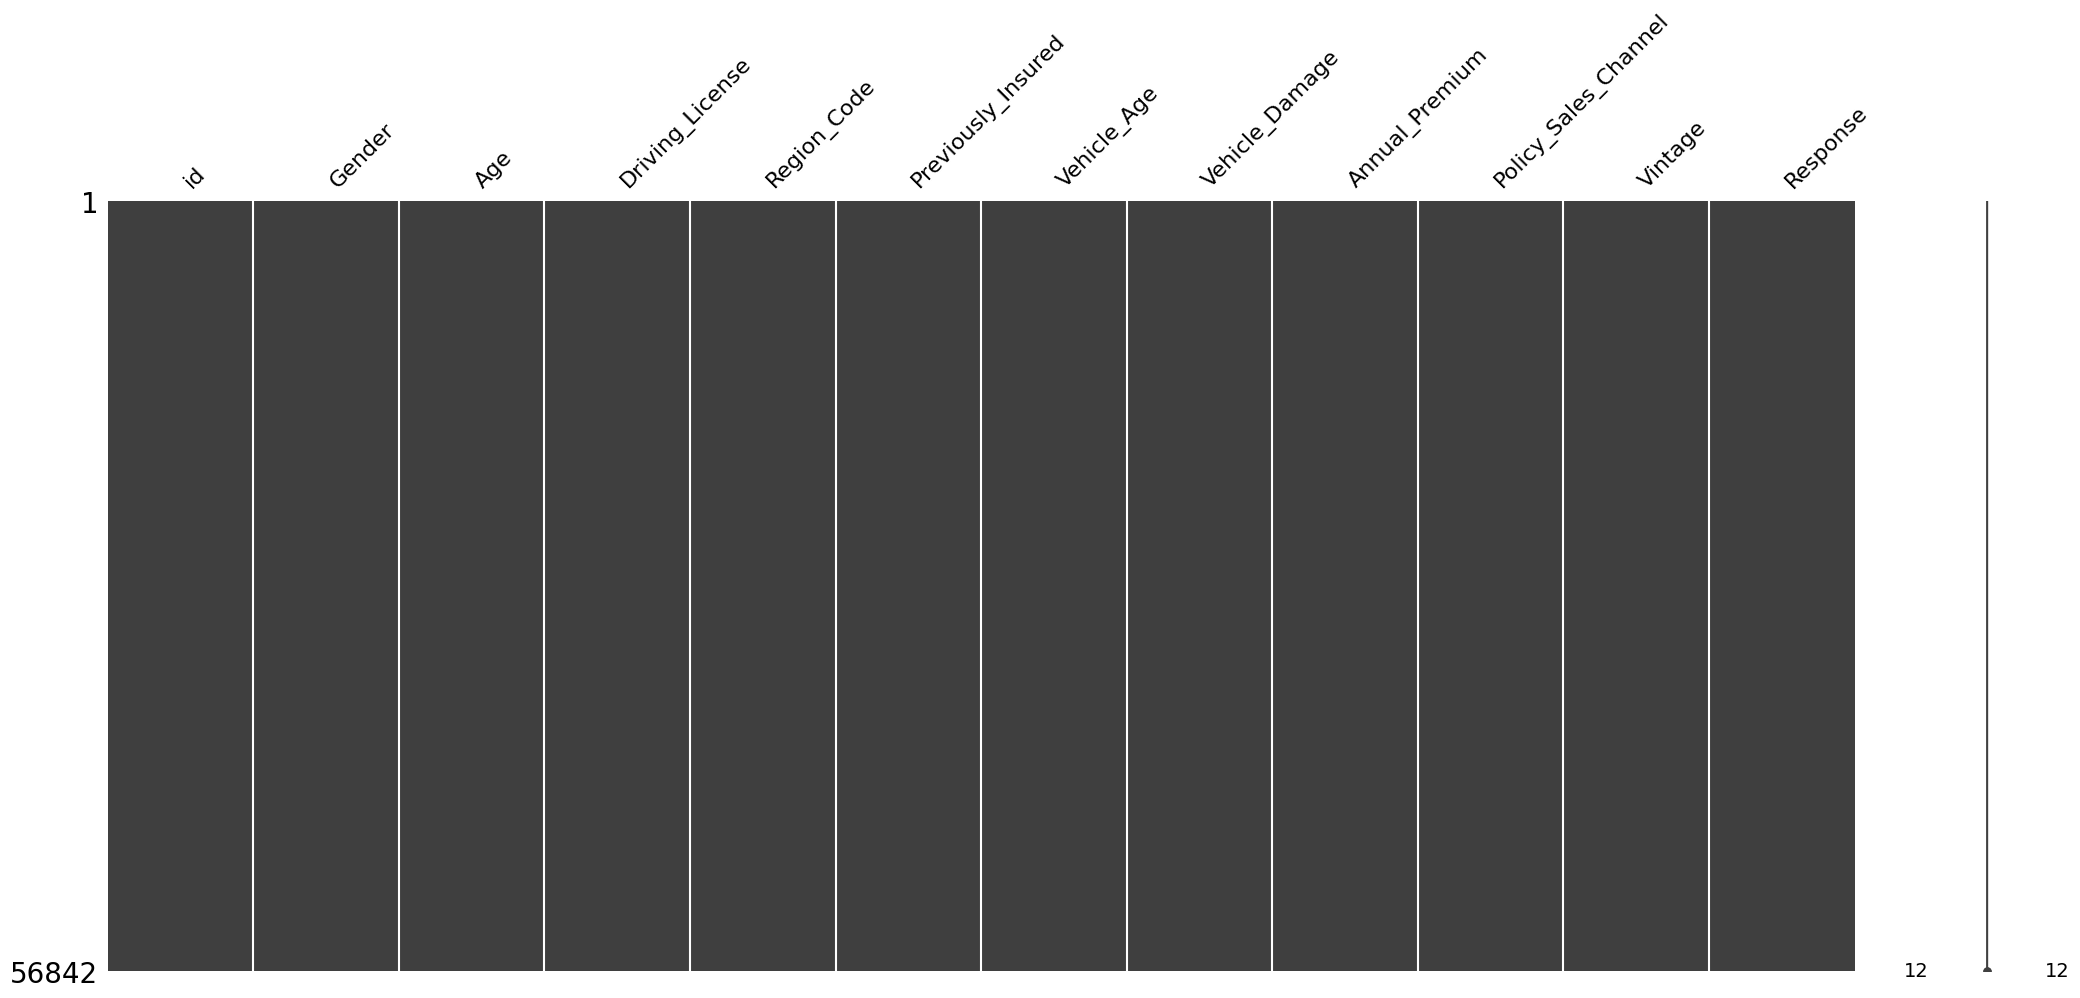

In [ ]:
# Visualizing the missing values
msno.matrix(df)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,56842.000000,56842,56842.000000,56842.000000,56842.000000,56842.000000,56842,56842,56842.000000,56842.000000,56842.000000,56842.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,30619,NaN,NaN,NaN,NaN,29782,28700,NaN,NaN,NaN,NaN
mean,28421.500000,NaN,38.766546,0.997783,26.407586,0.458446,NaN,NaN,30537.745646,112.432884,154.272862,0.122937
std,16409.016338,NaN,15.505450,0.047030,13.188777,0.498275,NaN,NaN,17123.414502,54.018987,83.715704,0.328368
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,14211.250000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24373.000000,30.000000,82.000000,0.000000
50%,28421.500000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31706.000000,150.000000,154.000000,0.000000
75%,42631.750000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39532.750000,152.000000,227.000000,0.000000


### Variables Description

id: indicates the id of the data row

Gender: indicates the gender of the customer

Age: indicates age of the customer

Driving License: indicates if the person is having driving license or not

Region Code: indicates the region code of the customer

Previously Insured: indicates if the customer has perviously insured for policy or not, 1 for yes and 0 for no

Vehicle Age: indicates the age of the vehicle owned by the customer

Vehicle Damage: indicates if the person has perviously damaged the vehicle

Annual Premium: indicates the annual permium for the customer that has to be paid

Policy Sales Channel: indicates the sales channel(Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.)

Vintage: indicates Number of Days, Customer has been associated with the company

Response: indicates if the customer is intersted or not(0 for no and 1 for yes)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
  if res<=3:
    x = df[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )

The number of unique variables in id column are: 56842
The number of unique variables in Gender column are: 2
printing unique values of Gender
the values are:  ['Male' 'Female']
The number of unique variables in Age column are: 66
The number of unique variables in Driving_License column are: 2
printing unique values of Driving_License
the values are:  [1 0]
The number of unique variables in Region_Code column are: 53
The number of unique variables in Previously_Insured column are: 2
printing unique values of Previously_Insured
the values are:  [0 1]
The number of unique variables in Vehicle_Age column are: 3
printing unique values of Vehicle_Age
the values are:  ['> 2 Years' '1-2 Year' '< 1 Year']
The number of unique variables in Vehicle_Damage column are: 2
printing unique values of Vehicle_Damage
the values are:  ['Yes' 'No']
The number of unique variables in Annual_Premium column are: 25848
The number of unique variables in Policy_Sales_Channel column are: 127
The number of unique 

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Having a copy of the dataframe(can be used if any manipulation on the orignal df is done)
copy_df = df.copy()


# dropping the id column
df.drop(['id'],axis=1, inplace=True)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No using function
# def convert_yes_no(obj):
#   '''this function converts Yes to 1 and No to 0'''
#   if obj == 1:
#     res = 'Yes'
#   else:
#     res = 'No'
#   return res
# df['Driving_License'] = df['Driving_License'].apply(convert_yes_no)
# df['Previously_Insured'] = df['Previously_Insured'].apply(convert_yes_no)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No using lambda function
df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
df['Previously_Insured']=df['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

### What all manipulations have you done and insights you found?

1. Dropped the id column as it was irrelevant

2. Converted the values in categorical columns 'Driving_License' & 'Previously_Insured' from 1 & 0 to Yes and No for better visualization.

3. Coverted 'Region_Code' , 'Annual_Premium' & 'Policy_Sales_Channel' columns from float to int datatype to make it space optimized.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**

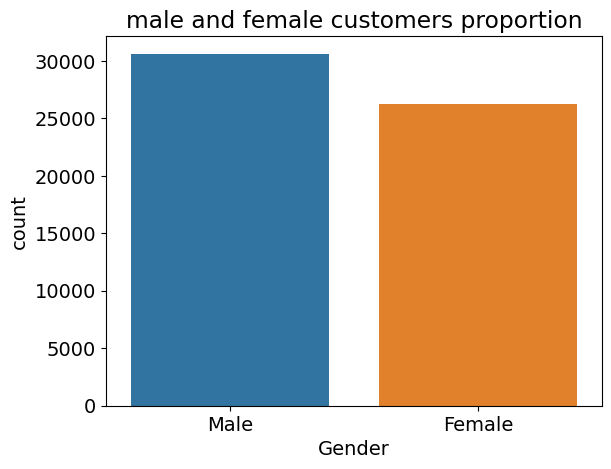

Male      30619
Female    26223
Name: Gender, dtype: int64


In [ ]:
# Chart - 1 visualization code
# plotting count plot
sns.countplot(x=df['Gender'], data=df)

# setting chart title
plt.title('male and female customers proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Gender.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

There are 206089 Male customers and 175020 Female customers

#### **Chart - 2**

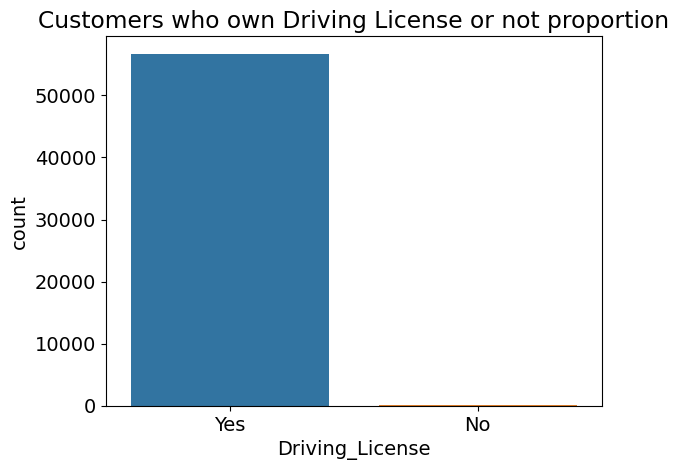

Yes    56716
No       126
Name: Driving_License, dtype: int64


In [ ]:
# Chart - 2 visualization code
sns.countplot(x='Driving_License', data=df)

# setting chart title
plt.title('Customers who own Driving License or not proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Driving_License.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

there are 380297 people who own Driving License and 812 don't

> Its found that most of the people who own driving license owns a car

#### **Chart - 3**

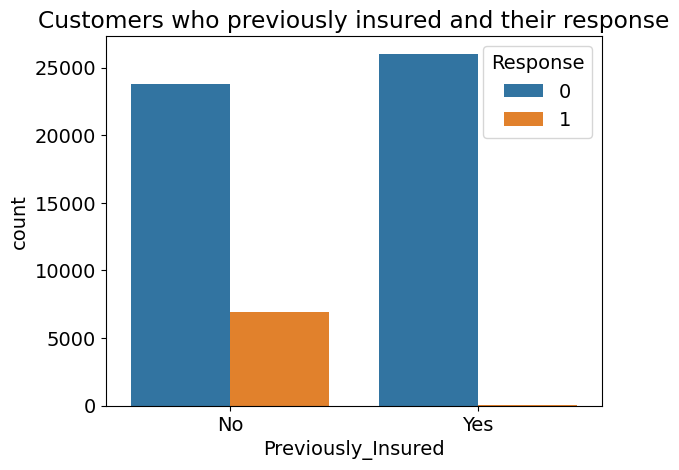

No     30783
Yes    26059
Name: Previously_Insured, dtype: int64


In [ ]:
# Chart - 3 visualization code
sns.countplot(x='Previously_Insured', data=df, hue = 'Response')

# setting chart title
plt.title('Customers who previously insured and their response')

# display chart
plt.show()

# printing the counts for reference
print(df.Previously_Insured.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is observed that people who have previously not insured are intrested in the policy

> It is found that people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured

#### **Chart - 4**

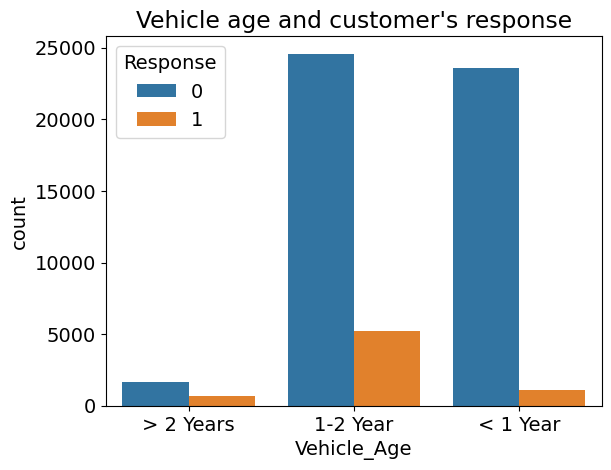

1-2 Year     29782
< 1 Year     24688
> 2 Years     2372
Name: Vehicle_Age, dtype: int64


In [ ]:
# Chart - 4 visualization code
sns.countplot(x='Vehicle_Age', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle age and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Age.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

1. It is observed that most of the people with vehicle age is 1-2 years.
2. ratio wise people with vehicle age greater than 2 years are more intrested in buying policy
3. most of the customers have their vehicle age as 1-2 years

> as per the ratio it is better to tap the customers whose vehicle age is more than 2 years and we have a good scope in people who own vehicle of age 1-2 years as well.

#### **Chart - 5**

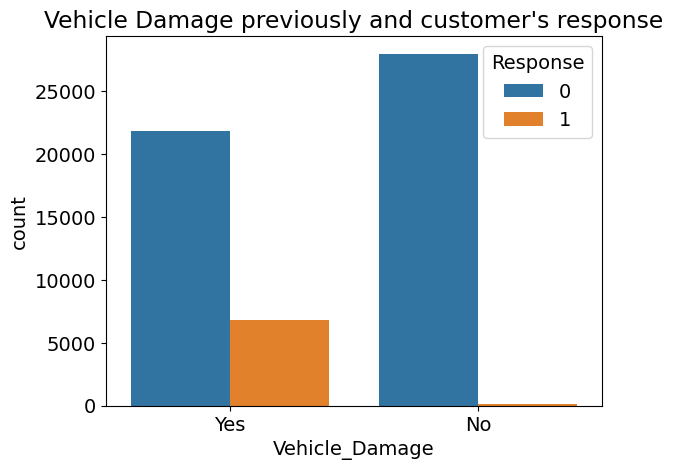

Yes    28700
No     28142
Name: Vehicle_Damage, dtype: int64


In [ ]:
# Chart - 5 visualization code
sns.countplot(x='Vehicle_Damage', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle Damage previously and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Damage.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

Its found that previously customers who got their vehicle damaged are more intrested in buying new policy

> customers who are previously not damaged their car are not much intrested in buying the policy

> people who have damaged their car previously are more intrested in buying the policy.

#### **Chart - 6**

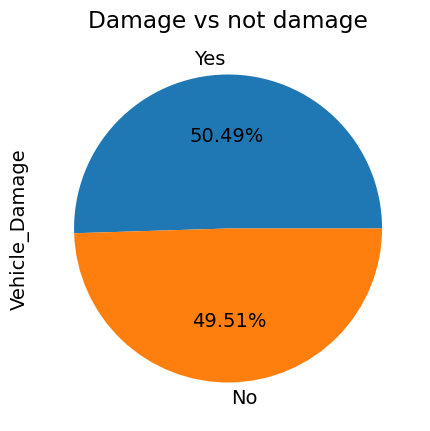

In [ ]:
# Chart - 6 visualization code
spread = df['Vehicle_Damage'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
spread.plot(kind = 'pie', autopct='%1.2f%%', pctdistance=0.6)

#setting colum chart title
plt.title(f'Damage vs not damage')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

It is found that people who have damaged their vehicle and not damaged share almost equal proportion.

> comparing the insights previously it is found that the people who damaged their vehicle are more intrested to buy ploicy, so since 50% of the people who are willing to buy the plociy, the market is big to capture

#### **Chart - 7**

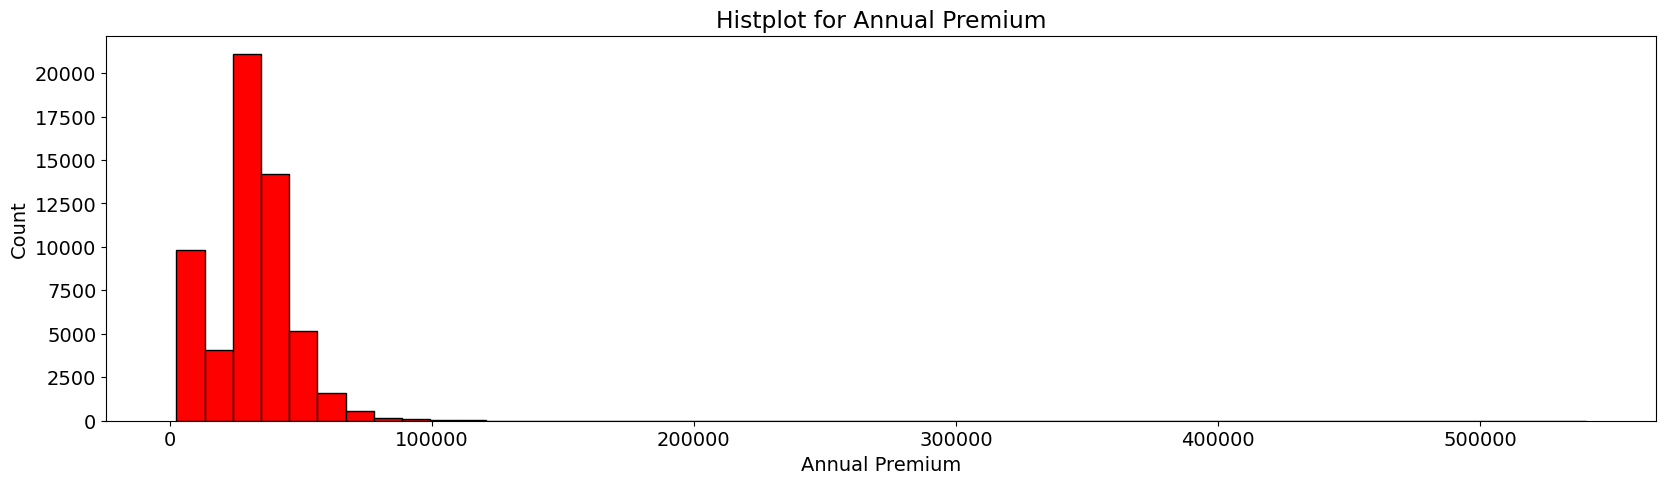

In [ ]:
# Chart - 7 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
plt.hist(df['Annual_Premium'], bins = 50, color='red', edgecolor='black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram chart shows the histogram for Anual premium

##### 2. What is/are the insight(s) found from the chart?

Most of the premium falls under range 5000-100000

>

#### **Chart - 8**

<Axes: >

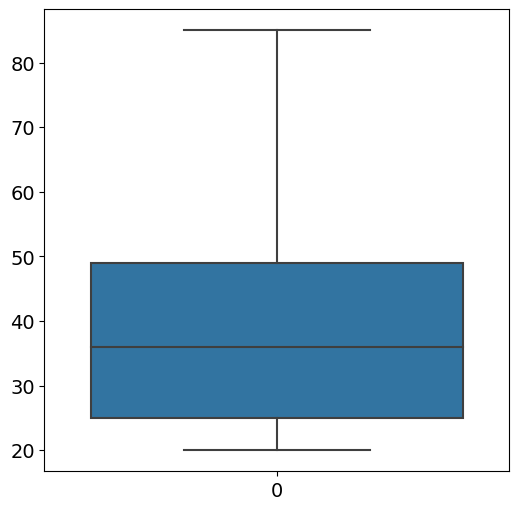

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(df['Age'])

##### 1. Why did you pick the specific chart?

The Box plot chart helps in getting an all-round view. and see if there are any outliers

##### 2. What is/are the insight(s) found from the chart?

There are no outliers in the age columns and most of the customers belong to age group 25-48

#### **Chart - 9**

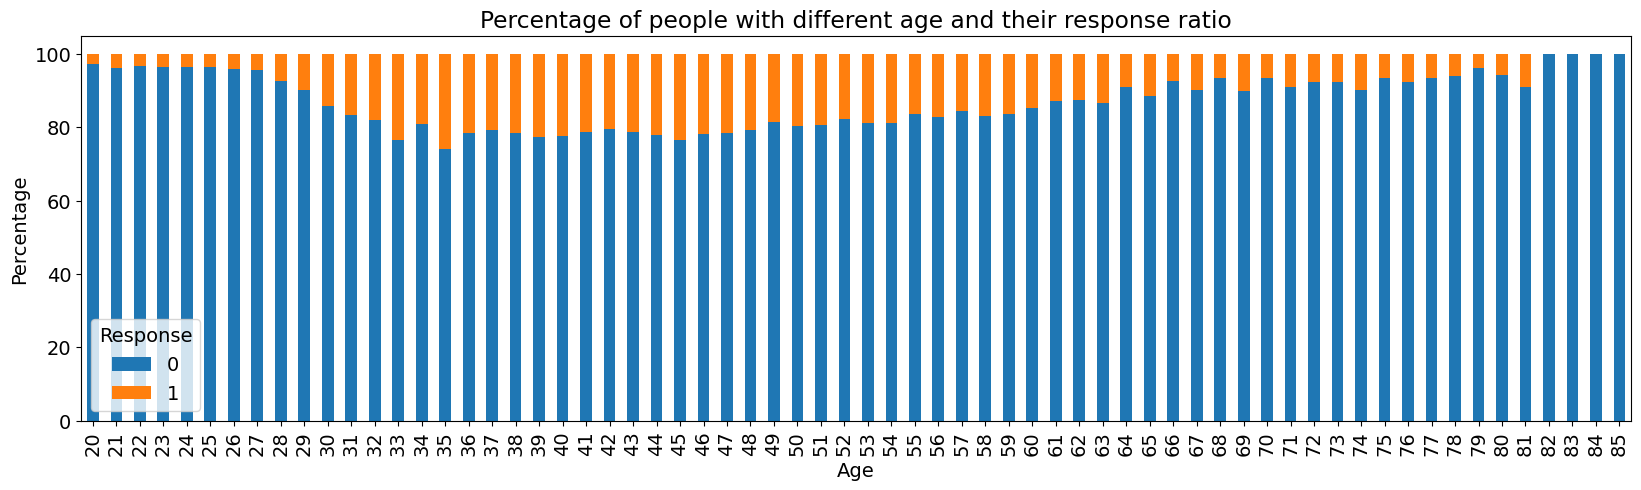

In [ ]:
# Chart - 9 visualization code
age_response = df.groupby(['Age', 'Response']).size().unstack()

#plotting
total_counts = age_response.sum(axis=1)
age_response_ratios = age_response.div(total_counts, axis=0) * 100

# create a stacked bar chart
age_response_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of people with different age and their response ratio')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Response')
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar plot shows the percentage for all ages and their response

##### 2. What is/are the insight(s) found from the chart?

Customes of age between 32-58 ar more mature and are intrested in buying the policy

> Tapping the customer of age between 32-58 would be more benificial

#### **Chart - 10**

Text(0, 0.5, 'Number of Customers')

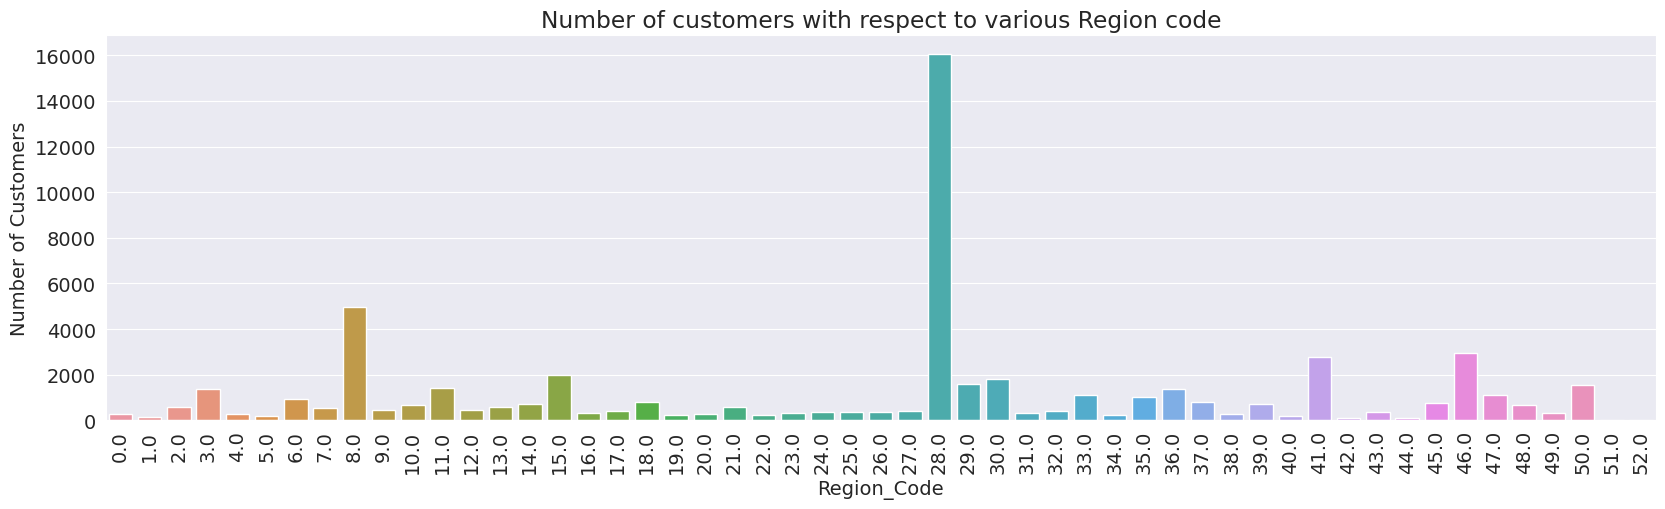

In [ ]:
# Chart - 10 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Region_Code', data=df)

plt.title('Number of customers with respect to various Region code')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

> Most of the customers belong to region code 28 followed by 8

> It helps us to understand that most of our customers belong to region code 28, so it would be better if we run our marketing campagn such that in 28 to aquire more customers and in other regions to penetrate the market.

#### **Chart - 11**

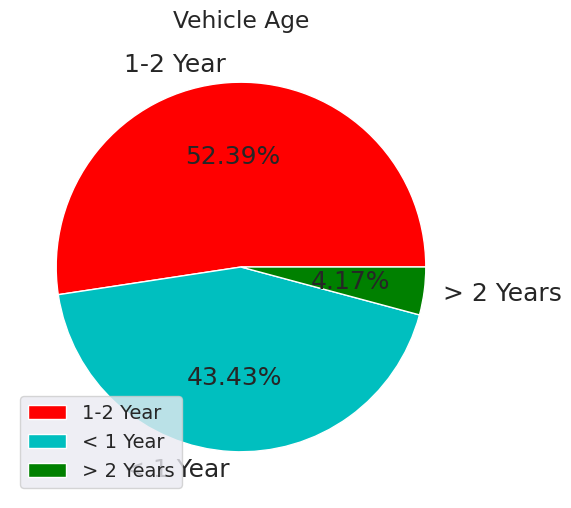

In [ ]:
# Chart - 11 visualization code
data = df['Vehicle_Age'].value_counts()
labels = [ '1-2 Year', '< 1 Year','> 2 Years']

#create pie chart
plt.figure(figsize=(6,6))
# explode=(0,0.1,0.1,0.1,0.0,1.3) explode=explode,
color = ['r', 'c', 'g', 'm', 'k']
plt.pie(data,  colors = color, autopct='%.2f%%',labels = labels, textprops={'fontsize': 18})
plt.title('Vehicle Age')
plt.legend()
plt.show()

# print(data)

# delete the data
del data


##### 1. Why did you pick the specific chart?

Pie plots are usually best for sharing visually distribution of data

##### 2. What is/are the insight(s) found from the chart?

Its found that most of the customer have vehicle age of around 1-2 year and there are less customers whose vehicle age is greater than 2 years.

#### **Chart - 12**

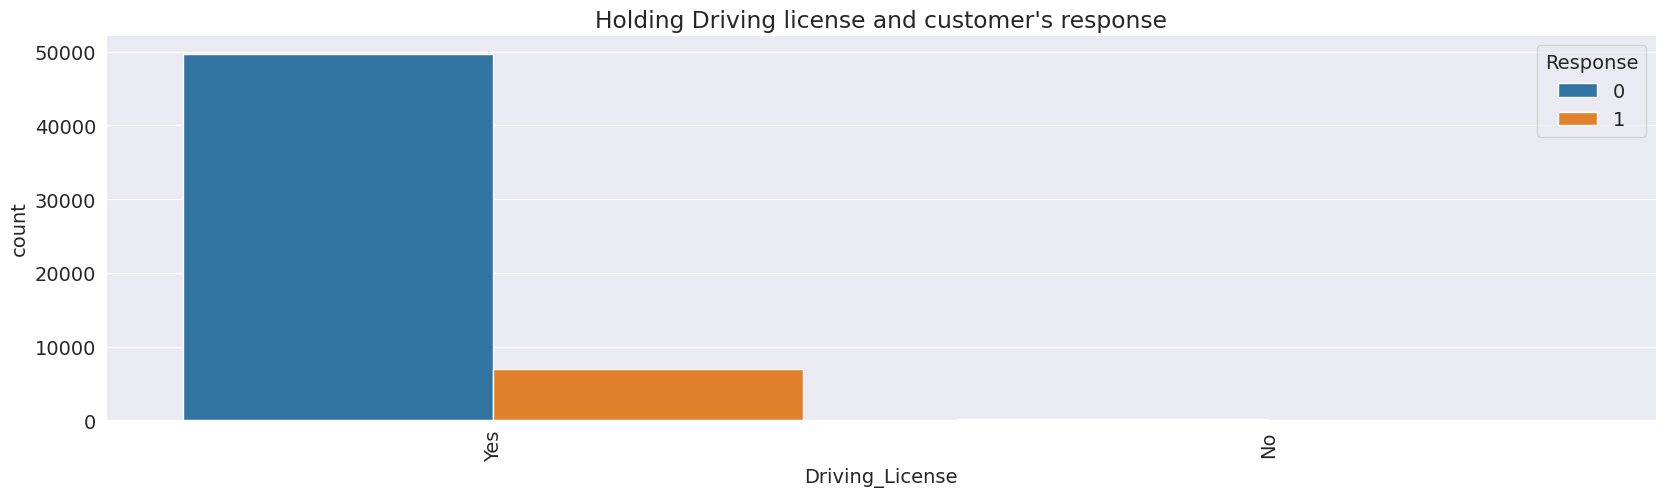

In [ ]:
# Chart - 12 visualization code
sns.countplot(x='Driving_License',hue='Response', data=df)

# setting chart title
plt.title('Holding Driving license and customer\'s response')
plt.xticks(rotation=90)

# display chart
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial .

#### **Chart - 13**

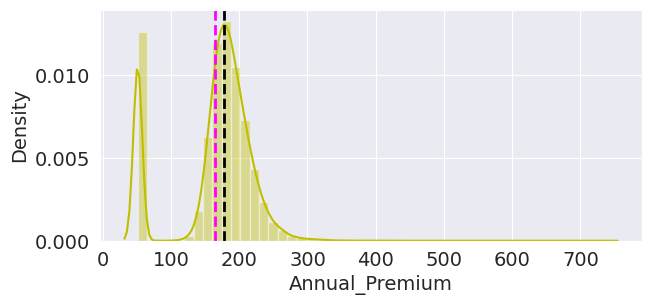

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(7,3))
plt.xlabel('Annual Premium')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Annual_Premium']), color="y")
ax.axvline(np.sqrt(df['Annual_Premium']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Annual_Premium']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### 1. Why did you pick the specific chart?

The ditribution chart shows the ditributon of the Annual Premium


##### 2. What is/are the insight(s) found from the chart?

we found the mean and median distribution of the Anuall Premium

> mean and median are nearly equal on the Annual Premium

#### **Chart - 14 - Correlation Heatmap**

Text(0.5, 52.7222222222222, 'Feature/Property')

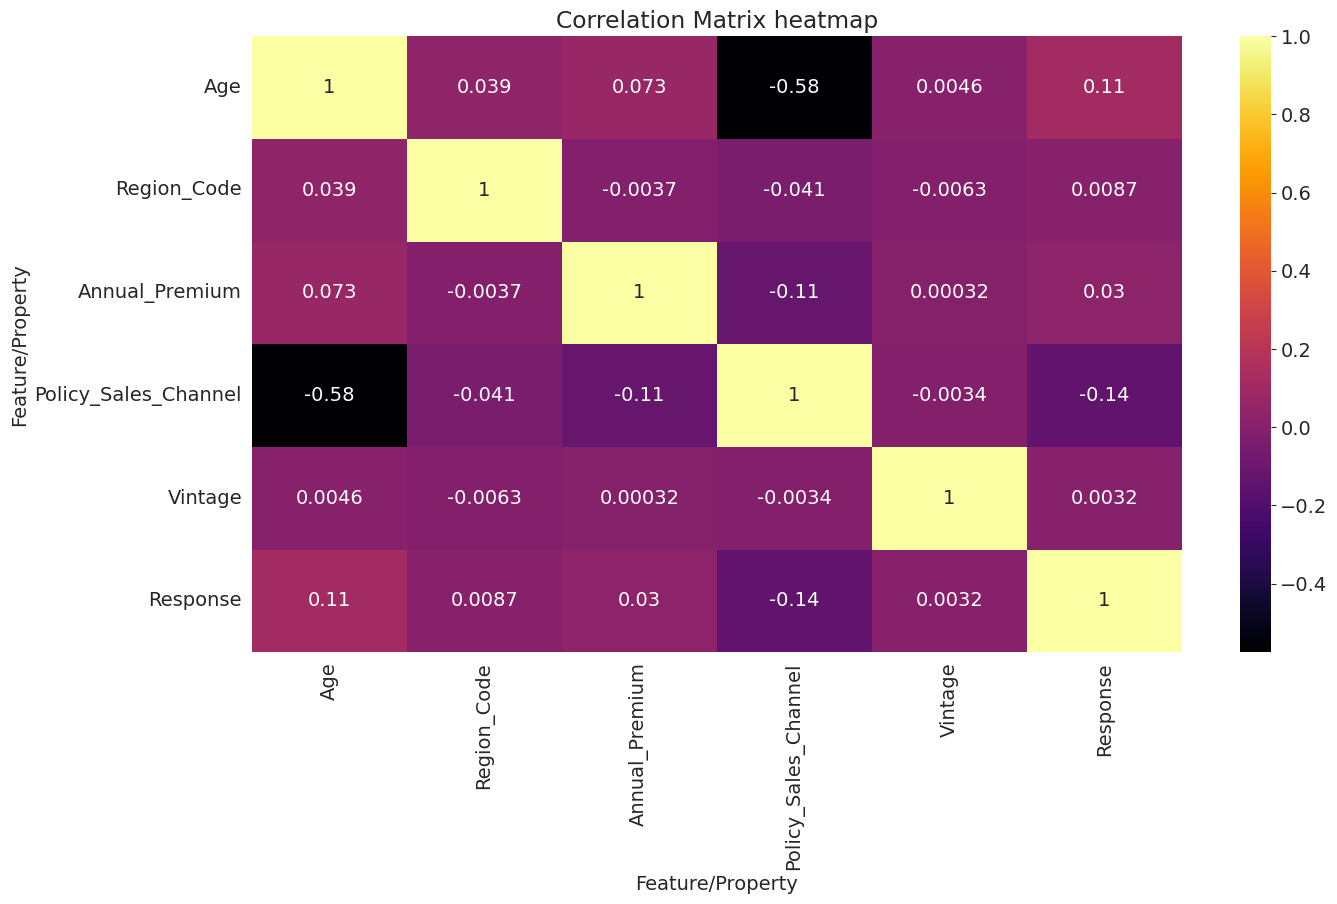

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

The corelation chart shows the relation between the two specific feature

##### 2. What is/are the insight(s) found from the chart?

> It is found that policy sales channel and respons is negativly correlated.

> most of the properties/features against eachother are very least correlated.

#### **Chart - 15 - Pair Plot**

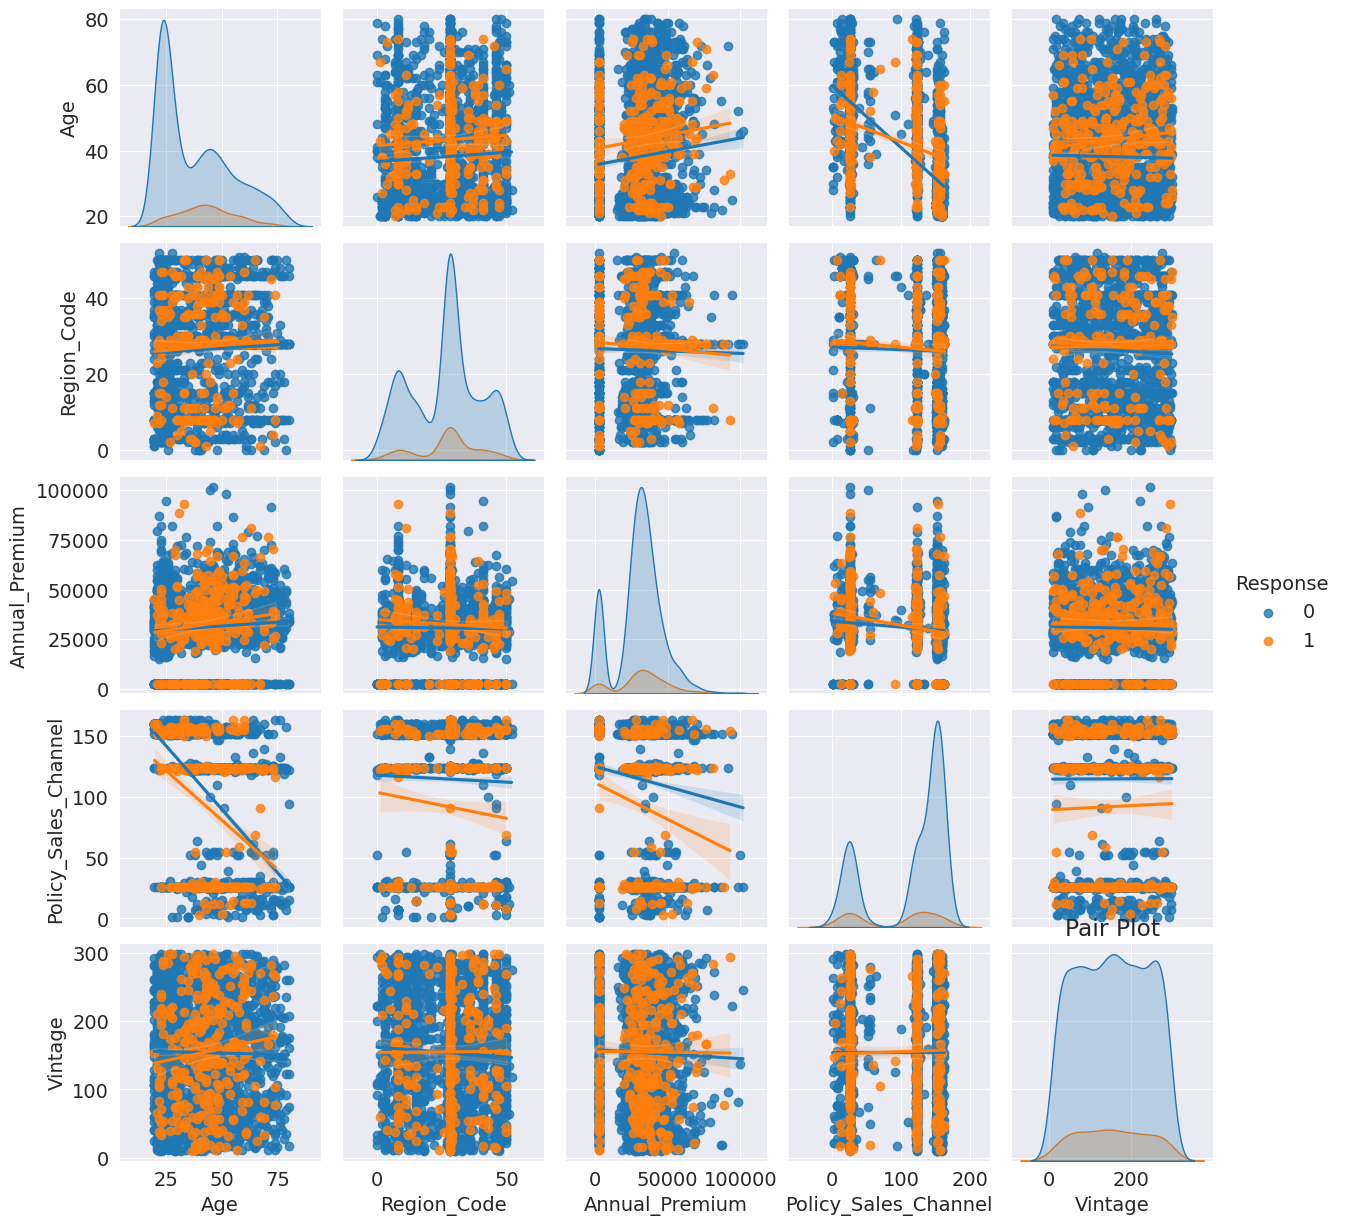

In [ ]:
# Pair Plot visualization code
df_sample = df.sample(n=2500, random_state=48)

# plotting pair plot for the sample database
# setting corner=True can still to reduce computation time, corner=True
sns.pairplot(df_sample, diag_kind="kde", kind = 'reg', hue = 'Response')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

# delete sample data
del df_sample

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.

##### 2. What is/are the insight(s) found from the chart?

positive response of Vintage customers are positivly correlated with annual customers

policy sales channel is negativly corellated to age.

## ***5. Hypothesis Testing***



> What is hypothesis testing in statistics with example?
Hypothesis testing is a statistical method used to determine if there is enough evidence in a sample data to draw conclusions about a population.



1. The average annual premium for a vehicle insurance is greater than 15,000.

2. The average age of the customer is greater than 32.

3. The Standard deviation of annual premium is 10,000.

### **Hypothetical Statement - 1**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average annual premium for a vehicle insurance is greater than 15,000.


*   Null hypothesis H0: Average Annual premium not > 15,000.

*   Alternate hypothesis Ha: Average Annual premium > 15,000.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
annual_premium_sample = df['Annual_Premium'].sample(500)
annual_premium_mean = np.mean(annual_premium_sample)
annual_premium_std = np.std(annual_premium_sample)

In [ ]:
# Computing test statistic

ts = (annual_premium_mean-15000)/(annual_premium_std/(np.sqrt(500)))
print(ts)

23.93392399745304


In [ ]:
# Calculating the probability

prob_z = norm.cdf(19.73, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

> As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average anuual premium is greater than 15,000.

### **Hypothetical Statement - 2**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average age of the customer is greater than 32.
*   Null hypothesis H0: Average age not > 32.

*   Alternate hypothesis Ha: Average age > 32.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
age_sample = df['Age'].sample(500)
age_mean = np.mean(age_sample)
age_std = np.std(age_sample)

In [ ]:
# Computing test statistic

ts = (age_mean-32)/(age_std/(np.sqrt(500)))
print(ts)

10.060986141678358


In [ ]:
# Calculating the probability

prob_z = norm.cdf(ts, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

1.0
0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

> As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average age f the customer is greater than 32.

### **Hypothetical Statement - 3**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of annual premium is 10,000.
*   Null hypothesis H0: Standard deviation != 10,000.

*   Alternate hypothesis Ha: Standard deviation = 10,000.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ap_sample = df['Annual_Premium'].sample(50)
S2 = (np.std(ap_sample))**2

In [ ]:
# Computing test statistic

ts3 = (49 * S2)/(10000*10000)
print(ts3)

105.79979431635599


In [ ]:
# Calculating the probability
prob = chi2.cdf(158.82,49)
print(prob)

0.9999999999998384


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

> As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 99.99%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of annual premium is 10,000.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# No missing Values

### 2. Handling Outliers

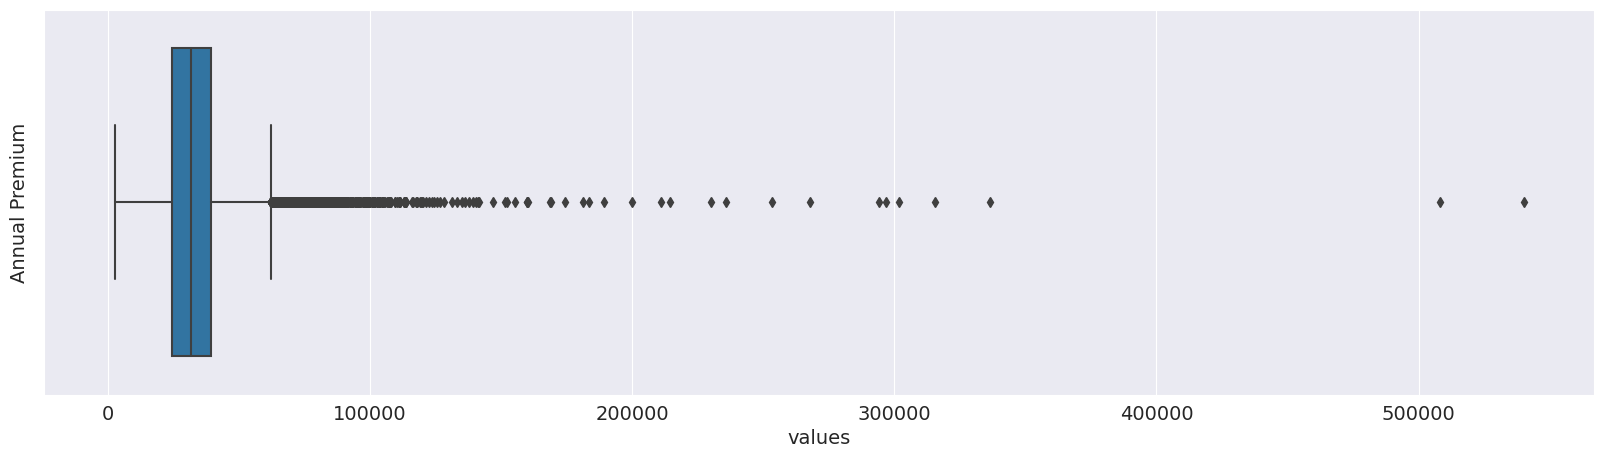

In [ ]:
# Handling Outliers & Outlier treatments
# Plotting the boxplot for 'Annual_Premium'
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
# Finding interquantile range

percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'upper limit = {upper_limit} \nlower limit = {lower_limit}')

upper limit = 62272.375 
lower limit = 1633.375


In [ ]:
# Capping
# Capping the data above the upper limit to upper limit & below the lower limit to the lower limit
import numpy as np

df['Annual_Premium'] = np.where(
    df['Annual_Premium'] > upper_limit,
    upper_limit,
    np.where(
        df['Annual_Premium'] < lower_limit,
        lower_limit,
        df['Annual_Premium']
    )
)

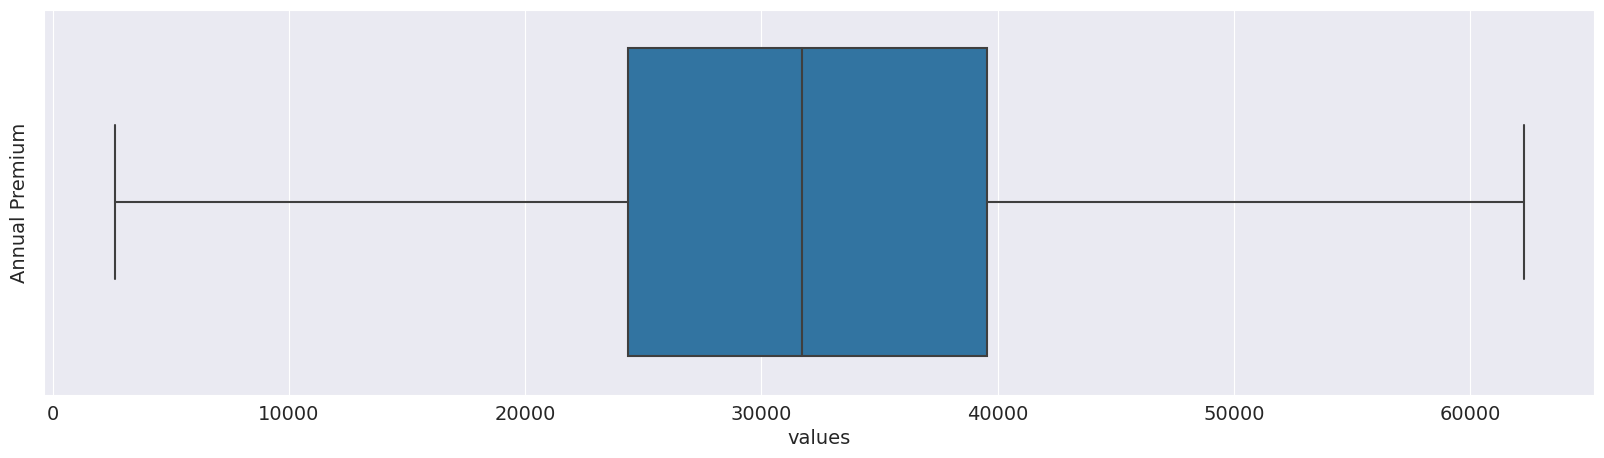

In [ ]:
# Plotting the boxplot again to check if the capping is correct
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**'Capping'** method is used to treat outliers. As there are 3,81,109 entries in the dataset and trimming the outliers shall lose lot of data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df=pd.get_dummies(df,drop_first=True,sparse=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Using one hot encoding and dropping the first column(drop_first=True) so that we get all the data in int format for easy machine learning.

### 4. Feature Manipulation & Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0


Text(0.5, 52.7222222222222, 'Feature/Property')

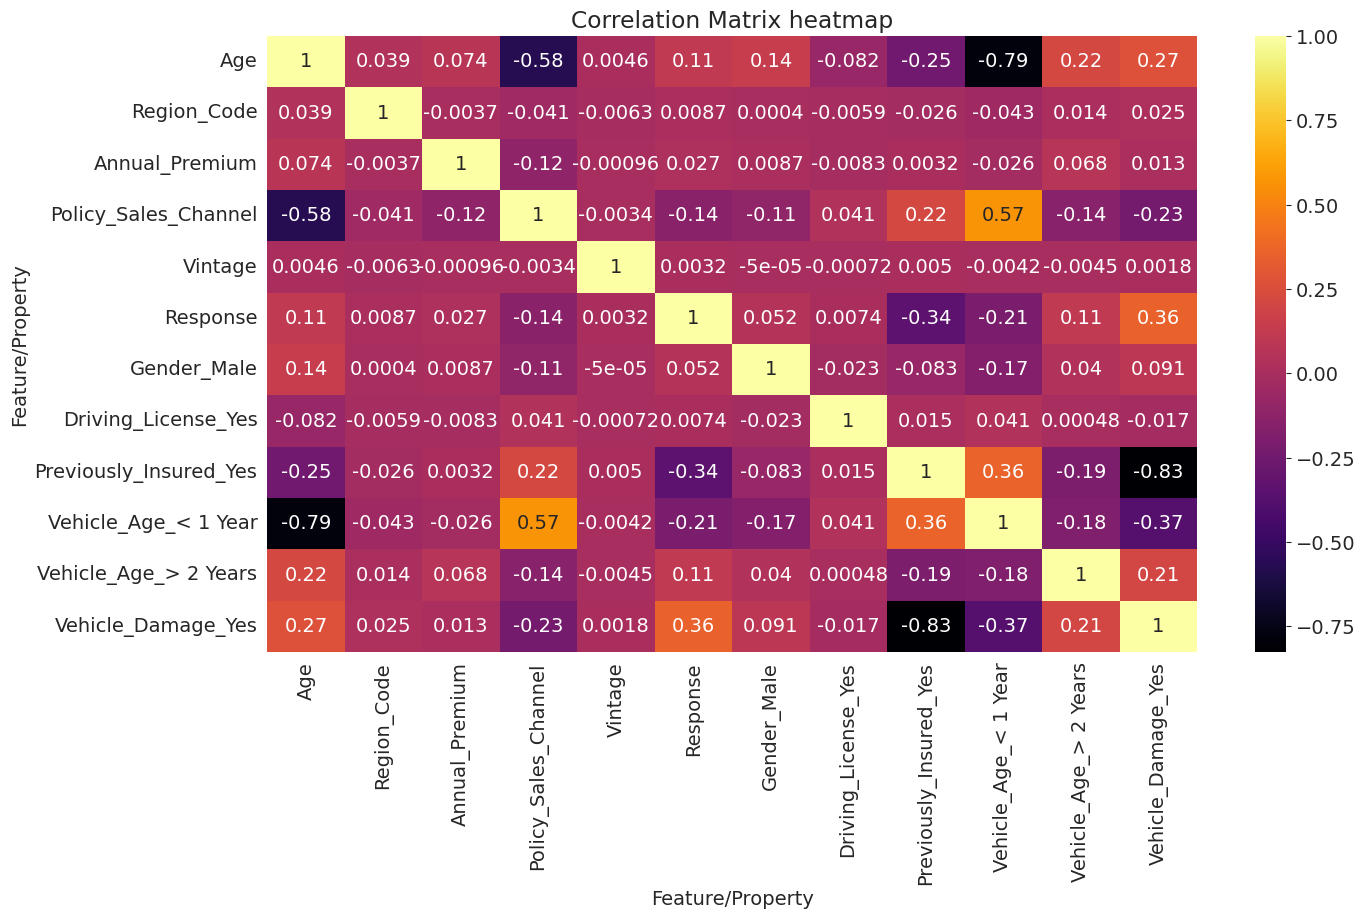

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

In [ ]:
df.drop(columns=['Driving_License_Yes'],axis=1,inplace=True)

### 5. Data Transformation

In [ ]:
#not required in this case

### 6. Data Scaling

In [ ]:
# Scaling your data
# performed this step after train and test data split

### 7. Dimesionality Reduction

In [ ]:
# Not needed

### 8. Data Splitting

In [ ]:
# spliting after balancing the data

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

> In Response we have more response as 0 compare to 1. so the dataset is known as imbalanced dataset.

> In a classification problem, the goal is to accurately predict the class or category of a given input data point. The accuracy of the classification model is highly dependent on the distribution of classes in the dataset. A dataset is said to be balanced if the number of samples in each class is roughly equal.

> In case of an imbalanced dataset, the model tends to be biased towards the majority class, resulting in poor performance on the minority class.

In [ ]:
#Defining X(independent variables) and y(response) variable

X=df.drop(['Response'],axis=1)
y=df['Response']
print('Before OverSampling')
print("counts of label '1': {}".format(sum(y == 1)))
print("counts of label '0': {}".format(sum(y == 0)))

Before OverSampling
counts of label '1': 6988
counts of label '0': 49854


In [ ]:
# Handling Imbalanced Dataset (If needed)
# Using SMOTE method

smote_var=SMOTE()
x_balanced, y_balanced = smote_var.fit_resample(X, y.ravel()) # y.ravel() is used to flatten the y array. ravel() converts it into a 1D array of shape (n_samples,).

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))


After OverSampling, counts of label '1': 49854
After OverSampling, counts of label '0': 49854


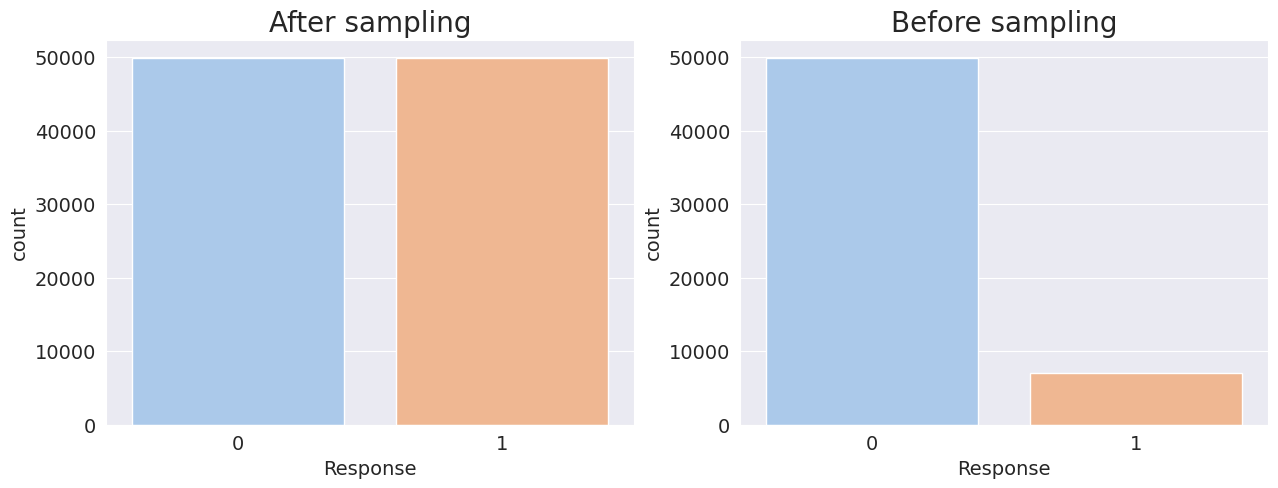

In [ ]:
# Visualizing the balanced dataset

plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x=df['Response'], data=df, palette='pastel')
plt.title('Before sampling',fontsize=20)

plt.subplot(1,2,1)
sns.countplot(x=y_balanced,palette='pastel')
plt.title('After sampling',fontsize=20)
plt.xlabel('Response')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used smote to balance

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(x_balanced,y_balanced, test_size=0.2,random_state=21)

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(79766, 10) (79766,)
(19942, 10) (19942,)


## ***7. ML Model Implementation***

In [ ]:
results = {}
after_tuning_results = {}

In [ ]:
def get_stat(model, X_train, X_test, y_train, y_test, output_name):
  '''this function implements the given model calculates the stastics and add the results to dictionary
  '''
  # fit the model
  model.fit(X_train,y_train)

  # predicting the test model
  y_pred = model.predict(X_test)

  # predict probability
  y_pred_probability = model.predict_proba(X_test)[:,1]
  print('--'*30)
  print(f'scores for {output_name}')
  print('--'*30)

  # calculating the recall score on y test and y predict
  recall_score_rs= recall_score(y_test, y_pred)
  print("Recall_Score : ", recall_score_rs)

  # calculating the Precision Score
  precision_score_ps= precision_score(y_test, y_pred)
  print("Precision Score :",precision_score_ps)

  # calculating the f1 Score
  f1_score_fs= f1_score(y_test, y_pred)
  print("f1_Score :", f1_score_fs)

  # calculating the accuracy Score
  accuracy_score_as= accuracy_score(y_test , y_pred)
  print("Accuracy_Score :",accuracy_score_as)

  # Calculating the ROC auc Score
  roc_auc_score_ras = roc_auc_score(y_test , y_pred)
  print("ROC_AUC Score:",roc_auc_score_ras)

  # storing the results
  results[output_name] = recall_score_rs, precision_score_ps, f1_score_fs, accuracy_score_as, roc_auc_score_ras

  # getting confusion matrix
  confusion_matrix_logic = metrics.confusion_matrix(y_test, y_pred)
  print('--'*30)
  print(f'confusion matrix for the implemented {output_name}')
  print('--'*30)
  print(confusion_matrix_logic)
  print('\n')

  # Plotting the confusion matrix
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_logic, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title(f'Confusion Matrix for {output_name}', fontsize=18)
  plt.show()

  print('--'*30)
  print(f'{output_name} ROC curve')
  print('--'*30)

  # Plotting ROC (Receiver Operating Characteristic) curve
  plt.rcParams['figure.figsize'] = (6,6)
  fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
  plt.title(f'{output_name} ROC curve')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.plot(fpr,tpr)
  plt.plot((0,1), linestyle="--",color='black')
  plt.show()

### **ML Model - 1**

> **logistic regression**

------------------------------------------------------------
scores for Logistic Regression
------------------------------------------------------------
Recall_Score :  0.9048481190907263
Precision Score : 0.7692176143651133
f1_Score : 0.8315385681933725
Accuracy_Score : 0.8172199378196771
ROC_AUC Score: 0.8174740595453631
------------------------------------------------------------
confusion matrix for the implemented Logistic Regression
------------------------------------------------------------
[[7301 2699]
 [ 946 8996]]




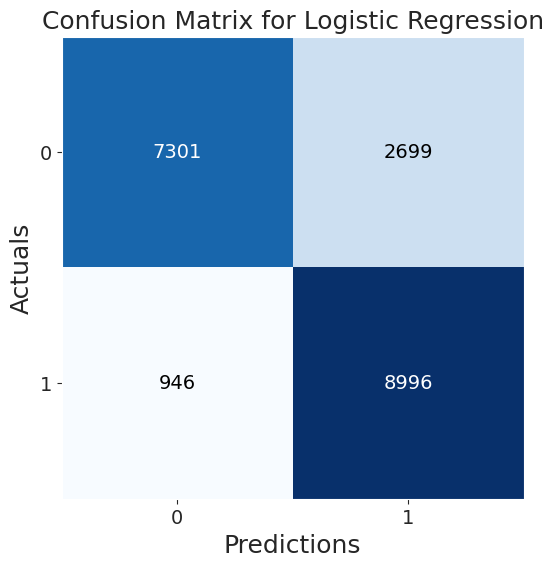

------------------------------------------------------------
Logistic Regression ROC curve
------------------------------------------------------------


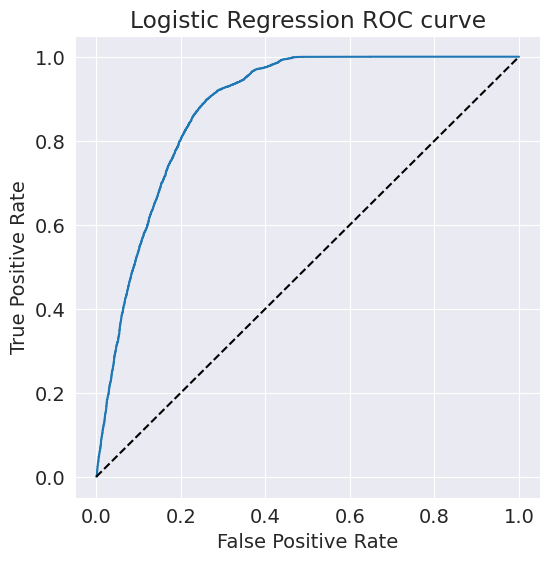

In [ ]:
# ML Model - 1 Implementation
# initiating the logistic regression
LoReg = LogisticRegression()

# Fit the Algorithm and Predict on the model
get_stat(LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression')


#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
scores for Logistic Regression after tuning
------------------------------------------------------------
Recall_Score :  0.9048481190907263
Precision Score : 0.7692176143651133
f1_Score : 0.8315385681933725
Accuracy_Score : 0.8172199378196771
ROC_AUC Score: 0.8174740595453631
------------------------------------------------------------
confusion matrix for the implemented Logistic Regression after tuning
------------------------------------------------------------
[[7301 2699]
 [ 946 8996]]




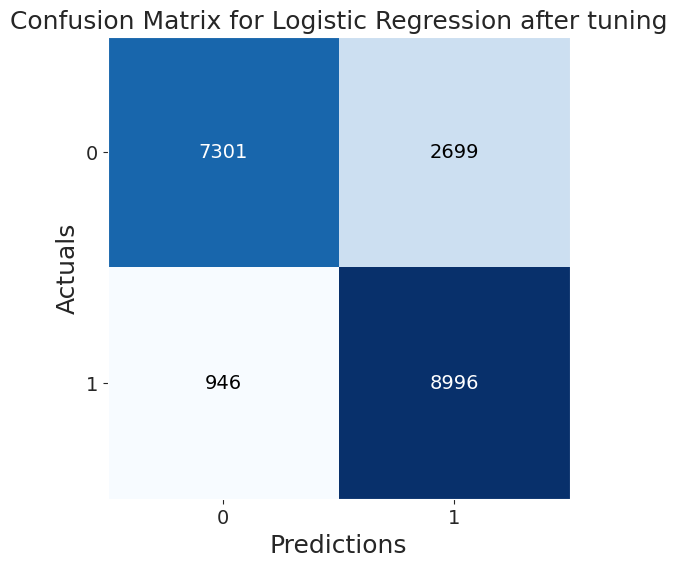

------------------------------------------------------------
Logistic Regression after tuning ROC curve
------------------------------------------------------------


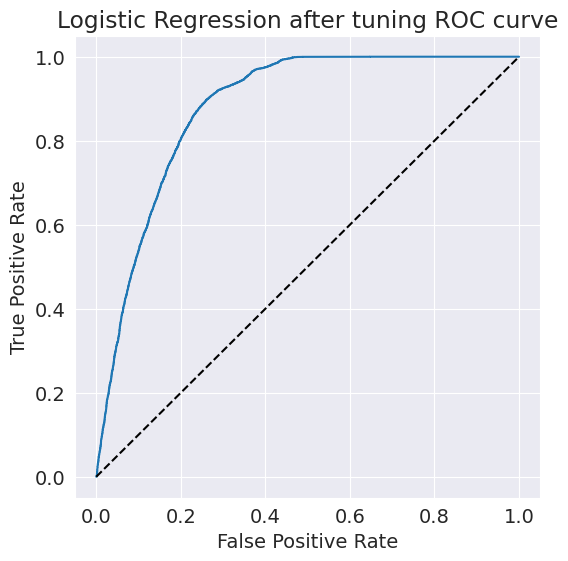

------------------------------------------------------------
Best cross-validation score: 0.8236717255835846
Best parameters: {'C': 1}


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#setting grid parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit the Algorithm and Predict on the model
grid_LoReg = GridSearchCV(LoReg, param_grid, cv=5)


# getting scores after gridsearchCV
get_stat(grid_LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression after tuning')
print('--'*30)
print("Best cross-validation score:", grid_LoReg.best_score_)
print("Best parameters:", grid_LoReg.best_params_)

##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** performs an exhaustive search over a specified hyperparameter space, creating a grid of all possible hyperparameter combinations, and evaluating the performance of each combination using cross-validation. It then selects the combination of hyperparameters that results in the best performance on the validation set.

---


The following code performs hyperparameter tuning on a logistic regression model using cross-validation:

The param_grid dictionary specifies the hyperparameters to tune, which in this case is the regularization parameter C.

GridSearchCV is used to perform a grid search over the specified hyperparameters.

cv=5 specifies a 5-fold cross-validation.
The hyperparameter that gives the best cross-validation score is selected as the optimal hyperparameter for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This is first implementation, however later we found random forest gives less false negative compare to this model.

### **ML Model - 2**

> **Random Forest Classifier**

------------------------------------------------------------
scores for Random Forest
------------------------------------------------------------
Recall_Score :  0.919633876483605
Precision Score : 0.8599510910458992
f1_Score : 0.8887916788179255
Accuracy_Score : 0.8852672750977836
ROC_AUC Score: 0.8853669382418023
------------------------------------------------------------
confusion matrix for the implemented Random Forest
------------------------------------------------------------
[[8511 1489]
 [ 799 9143]]




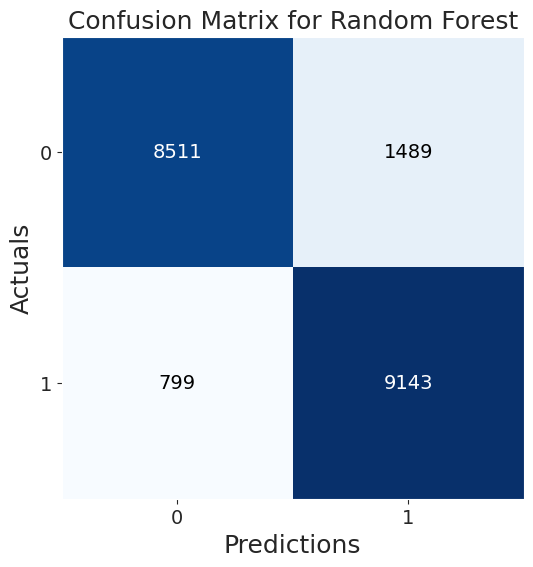

------------------------------------------------------------
Random Forest ROC curve
------------------------------------------------------------


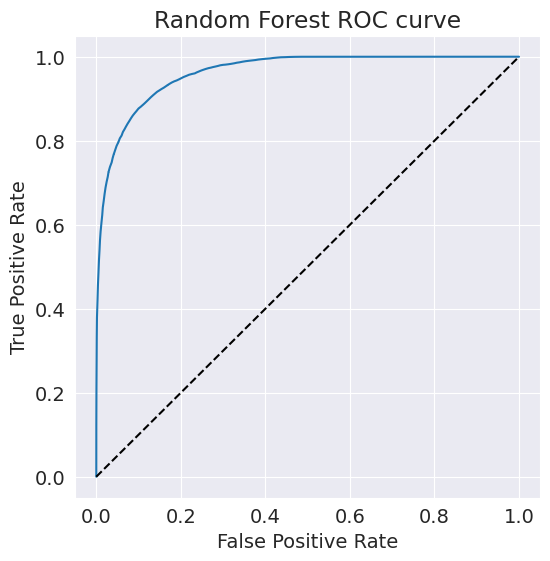

In [ ]:
# Visualizing evaluation Metric Score chart
# initializing rfc
rfc = RandomForestClassifier()
# geting stastics
get_stat(rfc, X_train, X_test, y_train, y_test, 'Random Forest')

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
scores for random forest after tuning
------------------------------------------------------------
Recall_Score :  0.9077650372158519
Precision Score : 0.786766628890245
f1_Score : 0.8429458740017745
Accuracy_Score : 0.8313609467455622
ROC_AUC Score: 0.8315825186079259
------------------------------------------------------------
confusion matrix for the implemented random forest after tuning
------------------------------------------------------------
[[7554 2446]
 [ 917 9025]]




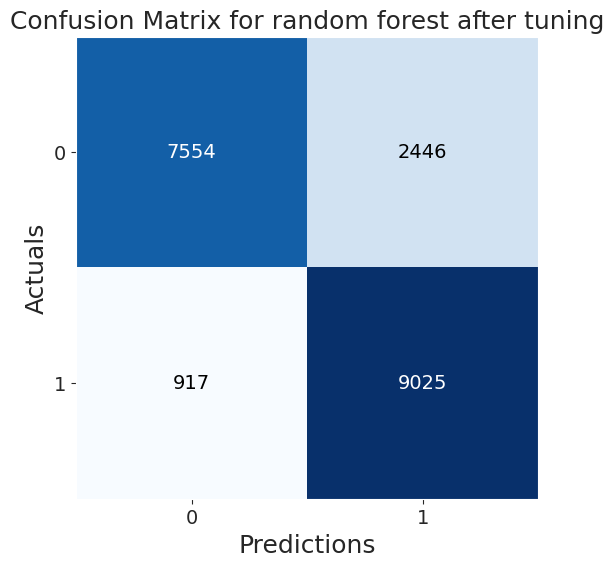

------------------------------------------------------------
random forest after tuning ROC curve
------------------------------------------------------------


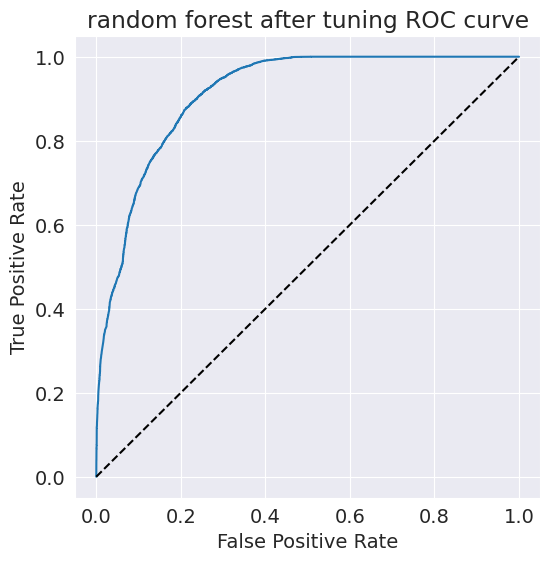

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the Algorithm and Predict on the model
get_stat(rfc_tuned, X_train, X_test, y_train, y_test, 'random forest after tuning')

##### Which hyperparameter optimization technique have you used and why?

The following hyperparameters tuning has been done in the RandomForestClassifier:

bootstrap=True: Whether bootstrap samples are used when building trees.

ccp_alpha=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning.

criterion='gini': The function to measure the quality of a split.

max_depth=30: The maximum depth of the tree.

max_features='log2': The number of features to consider when looking for the best split.

max_leaf_nodes=40: The maximum number of leaf nodes in the tree.

max_samples=None: The number of samples to draw from X to train each base estimator.

min_impurity_decrease=0.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_samples_leaf=1: The minimum number of samples required to be at a leaf node.

min_samples_split=4: The minimum number of samples required to split an internal node.

min_weight_fraction_leaf=0.0: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
n_estimators=200: The number of trees in the forest.

n_jobs=None: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context.

oob_score=False: Whether to use out-of-bag samples to estimate the generalization accuracy.

random_state=None: Control the randomness of the estimator.

verbose=0: Controls the verbosity when fitting and predicting.

warm_start=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

> there is improvement in the model comparing to the Logistic regression.

> the false positive is more in logistic regression(7107) compare to random forest(5947) Random forest is providing better solution to the business.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Recall_Score :  0.9170881340715248

Precision_Score : 0.7752605747824327

f1_Score : 0.8402314135694995

Accuracy_Score : 0.8257476076555024

ROC_AUC Score: 0.8258158435186549

### **ML Model - 3**

> **XGBClassifier**

------------------------------------------------------------
scores for XGB Classifier
------------------------------------------------------------
Recall_Score :  0.8980084490042245
Precision Score : 0.8866818949250174
f1_Score : 0.8923092299235421
Accuracy_Score : 0.8919366161869421
ROC_AUC Score: 0.8919542245021123
------------------------------------------------------------
confusion matrix for the implemented XGB Classifier
------------------------------------------------------------
[[8859 1141]
 [1014 8928]]




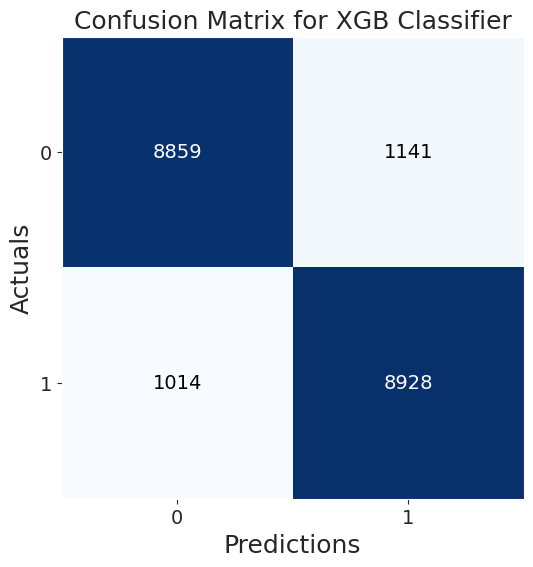

------------------------------------------------------------
XGB Classifier ROC curve
------------------------------------------------------------


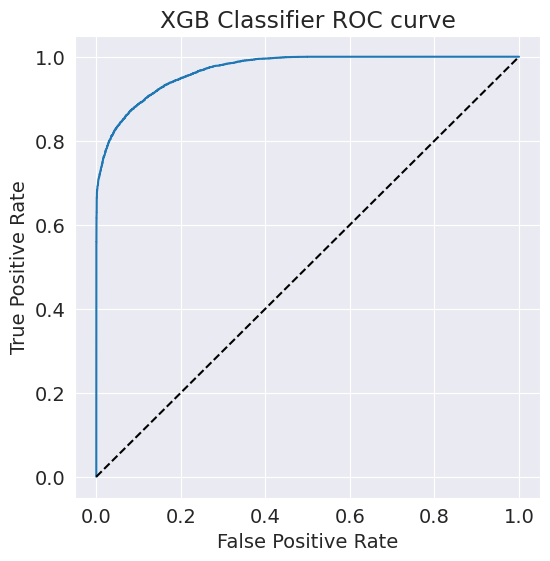

In [ ]:
# ML Model - 3 Implementation
xgb = XGBClassifier()

# Fit the Algorithm and Predict
get_stat(xgb, X_train, X_test, y_train, y_test, 'XGB Classifier')

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
scores for XGB Classifier after tuning
------------------------------------------------------------
Recall_Score :  0.9422651377992356
Precision Score : 0.7747270922924248
f1_Score : 0.8503222292820187
Accuracy_Score : 0.8346203991575569
ROC_AUC Score: 0.8349325688996178
------------------------------------------------------------
confusion matrix for the implemented XGB Classifier after tuning
------------------------------------------------------------
[[7276 2724]
 [ 574 9368]]




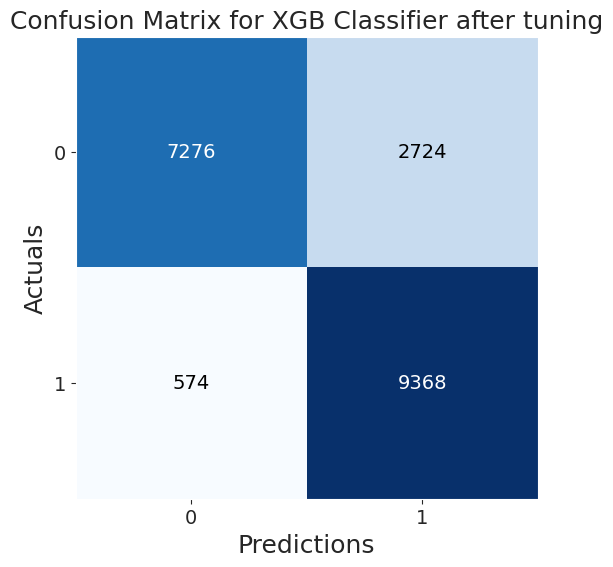

------------------------------------------------------------
XGB Classifier after tuning ROC curve
------------------------------------------------------------


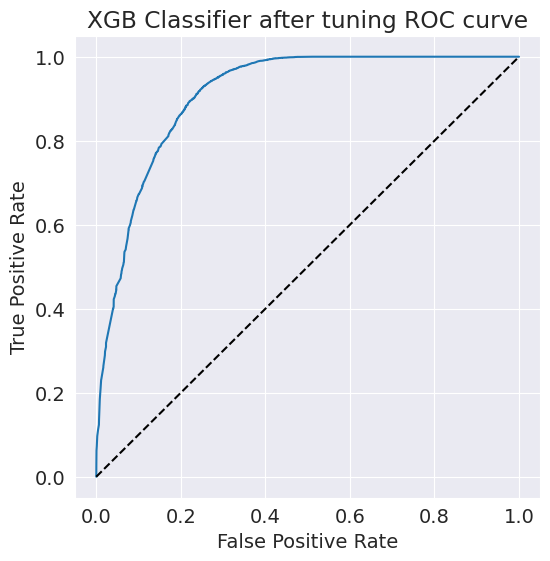

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [10, 20],
}

# Perform cross-validation and hyperparameter tuning
grid_search_cv_xgb = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
# Fit the Algorithm and Predict on the model
get_stat(grid_search_cv_xgb, X_train, X_test, y_train, y_test, 'XGB Classifier after tuning')


##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV** performs an exhaustive search over a specified hyperparameter space, creating a grid of all possible hyperparameter combinations, and evaluating the performance of each combination using cross-validation. It then selects the combination of hyperparameters that results in the best performance on the validation set.


---


The following code is performing hyperparameter tuning for an XGBoost classifier using GridSearchCV. It is searching for the best combination of hyperparameters from the given parameter grid:

max_depth: maximum depth of a tree.

learning_rate: learning rate (shrinkage) used in each boosting step.

n_estimators: number of boosting rounds (i.e., number of trees in the forest).

The code is using 5-fold cross-validation to evaluate the performance of each hyperparameter combination and the accuracy scoring metric. The resulting best hyperparameters will be used to train the final XGBoost model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing to Random forest, XGB is performing better

false negative of XGB is more compare to random forest, hence this model would result a good cout to the business problem

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

> Recall_Score would bw a better metrics as we do not want to miss on the customers who were intrested to by the policy and we miss them.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

> XGB classifier after tuning is better with f1 score and the precession score is improved so it is better to go with this .

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
features = x_balanced.columns
importances = grid_search_cv_xgb.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# Sort features by importance score in descending order
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

# Create a DataFrame with sorted feature importances
feature_importances = pd.DataFrame({'Feature': sorted_features, 'Importance': sorted_importances})
# feature_importances = pd.DataFrame({'Feature': sorted_features, 'Importance': sorted_importances})

In [ ]:
# feature_importances = pd.DataFrame({'Feature': x_balanced.columns, 'Importance': importances})

# sort the DataFrame by importance score in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

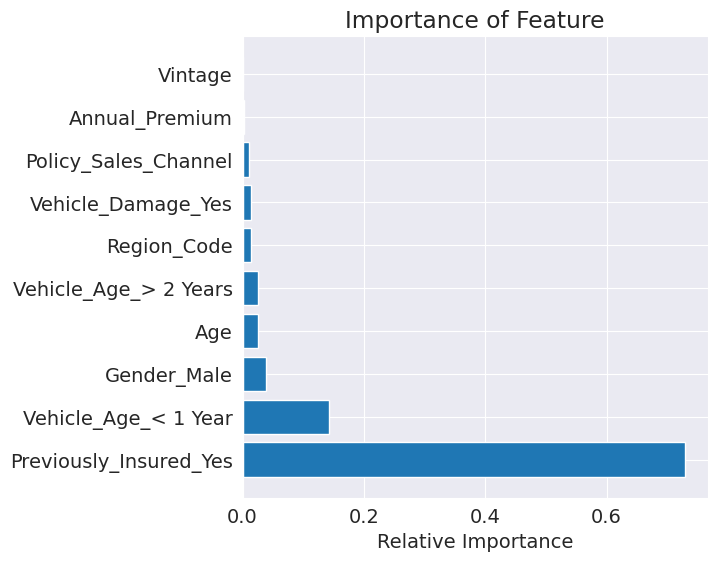

In [ ]:
#Plotting figure
plt.figure(figsize=(6,6))
plt.title('Importance of Feature')
plt.barh(y=feature_importances['Feature'], width=feature_importances['Importance'])

# plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

> As we can see from the feature importance graph, the feature 'Previously_Insured_yes' can be considered as most important with relative importance of 0.38.

> The next 4 features are vintage, annual_premium, age and vehicle_damage-yes can be considered with relative importance 0.26, 0.125, 0.095, 0.075  respectivly

> As these 5 main features play a role in decreasing the value of entropy, the machine learning model, random forest classifier considers them closer to the root node.

# **Conclusion**

the following are the false negative values:

normal Lin reg = 7158

Logistic Regression after tuning = 7158

Random Forest = 6014

random forest after tuning = 5831

XGB Classifier = 7179

XGB Classifier after tuning = 4011

it can be seen that xgb classifier after tuning is better givig us less false positive, for busniess growth this could help us.



In [ ]:
res=pd.DataFrame(results,index=["Recall Score", 'Precision Score', "f1 Score",'Accuracy Score','ROC_AUC Score'])
res.transpose()

,Recall Score,Precision Score,f1 Score,Accuracy Score,ROC_AUC Score
Logistic Regression,0.904848,0.769218,0.831539,0.817220,0.817474
Logistic Regression after tuning,0.904848,0.769218,0.831539,0.817220,0.817474
Random Forest,0.919634,0.859951,0.888792,0.885267,0.885367
random forest after tuning,0.907765,0.786767,0.842946,0.831361,0.831583
XGB Classifier,0.898008,0.886682,0.892309,0.891937,0.891954
XGB Classifier after tuning,0.942265,0.774727,0.850322,0.834620,0.834933


> Recall Score: This is a metric that measures the proportion of actual positive cases that are correctly identified by the model. It is also known as sensitivity or true positive rate (TPR).

###**Solution after ML implementation**


**the insurance company can deploy a machine learning model(Tuned with best parameters) that uses XGB Classifier** to predict the wheather the already existing health insurance customer would be interested in a vehicle insurance product. The company can improve the conversion rate by taking steps to encourage people to buy vehicle insurance by offering some incentives/ease of application & claim settlement process.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***